## This is the softmax workbook for ECE C147/C247 Assignment #2

Please follow the notebook linearly to implement a softmax classifier.

Please print out the workbook entirely when completed.

We thank Serena Yeung & Justin Johnson for permission to use code written for the CS 231n class (cs231n.stanford.edu).  These are the functions in the cs231n folders and code in the jupyer notebook to preprocess and show the images.  The classifiers used are based off of code prepared for CS 231n as well.

The goal of this workbook is to give you experience with training a softmax classifier.

In [101]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = '/Users/lixinyi/Desktop/2020 winter ucla/ece 247/HW2-code/cifar-10-batches-py' # You need to update this line
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Training a softmax classifier.

The following cells will take you through building a softmax classifier.  You will implement its loss function, then subsequently train it with gradient descent.  Finally, you will choose the learning rate of gradient descent to optimize its classification performance.

In [103]:
from nndl import Softmax

In [104]:
# Declare an instance of the Softmax class.  
# Weights are initialized to a random value.
# Note, to keep people's first solutions consistent, we are going to use a random seed.

np.random.seed(1)

num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

softmax = Softmax(dims=[num_classes, num_features])

#### Softmax loss

In [105]:
## Implement the loss function of the softmax using a for loop over
#  the number of examples

loss = softmax.loss(X_train, y_train)

In [106]:
print(loss)

2.3277607028048943


In [107]:
print(abs(np.log(0.1)))

2.3025850929940455


## Question: 

You'll notice the loss returned by the softmax is about 2.3 (if implemented correctly).  Why does this make sense?

## Answer:

The softmax loss is approximately 2.3. The possiblity of the a class being correctly chosen is about 0.1. Which means the log(0.1)~ 2.3 should be the loss for this randomly chosen W.  

#### Softmax gradient

In [108]:
a = np.exp(1) + np.exp(2)
a = np.log(a)
print(a)

2.3132616875182226


In [109]:
## Calculate the gradient of the softmax loss in the Softmax class.
# For convenience, we'll write one function that computes the loss
#   and gradient together, softmax.loss_and_grad(X, y)
# You may copy and paste your loss code from softmax.loss() here, and then
#   use the appropriate intermediate values to calculate the gradient.

loss, grad = softmax.loss_and_grad(X_dev,y_dev)

# Compare your gradient to a gradient check we wrote. 
# You should see relative gradient errors on the order of 1e-07 or less if you implemented the gradient correctly.
softmax.grad_check_sparse(X_dev, y_dev, grad)

numerical: 0.056539 analytic: 0.056539, relative error: 1.728604e-08
numerical: -0.464666 analytic: -0.464667, relative error: 1.012137e-07
numerical: -0.930229 analytic: -0.930229, relative error: 2.513634e-09
numerical: 1.958180 analytic: 1.958180, relative error: 5.745334e-09
numerical: -0.425493 analytic: -0.425493, relative error: 7.603569e-08
numerical: -0.184898 analytic: -0.184898, relative error: 6.735641e-08
numerical: 0.505044 analytic: 0.505044, relative error: 1.052904e-07
numerical: -1.567181 analytic: -1.567181, relative error: 1.201447e-08
numerical: 0.170606 analytic: 0.170606, relative error: 4.127522e-08
numerical: -1.790269 analytic: -1.790269, relative error: 2.745619e-08


## A vectorized version of Softmax

To speed things up, we will vectorize the loss and gradient calculations.  This will be helpful for stochastic gradient descent.

In [110]:
a = np.array([[1,2,3], [4,5,6], [7,8,9],[1,4,7]])

b = np.array([[2],[2],[2],[2]])
c = np.reshape(np.sum(a, axis = 1),(4,1))
print(c.shape)
print(a/c)
print(a/b)
print(b.shape)
a[np.arange(len(a)),[0,1,2,1]] = 0

print(a)



(4, 1)
[[0.16666667 0.33333333 0.5       ]
 [0.26666667 0.33333333 0.4       ]
 [0.29166667 0.33333333 0.375     ]
 [0.08333333 0.33333333 0.58333333]]
[[0.5 1.  1.5]
 [2.  2.5 3. ]
 [3.5 4.  4.5]
 [0.5 2.  3.5]]
(4, 1)
[[0 2 3]
 [4 0 6]
 [7 8 0]
 [1 0 7]]


In [111]:
import time

In [112]:
## Implement softmax.fast_loss_and_grad which calculates the loss and gradient
#    WITHOUT using any for loops.  

# Standard loss and gradient
tic = time.time()
loss, grad = softmax.loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Normal loss / grad_norm: {} / {} computed in {}s'.format(loss, np.linalg.norm(grad, 'fro'), toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax.fast_loss_and_grad(X_dev, y_dev)
toc = time.time()
print('Vectorized loss / grad: {} / {} computed in {}s'.format(loss_vectorized, np.linalg.norm(grad_vectorized, 'fro'), toc - tic))

# The losses should match but your vectorized implementation should be much faster.
print('difference in loss / grad: {} /{} '.format(loss - loss_vectorized, np.linalg.norm(grad - grad_vectorized)))

# You should notice a speedup with the same output.

Normal loss / grad_norm: 2.327534103738703 / 304.8724639403502 computed in 0.07722115516662598s
Vectorized loss / grad: 2.3275341037387025 / 304.8724639403502 computed in 0.0050389766693115234s
difference in loss / grad: 4.440892098500626e-16 /2.806767816379945e-13 


## Stochastic gradient descent

We now implement stochastic gradient descent.  This uses the same principles of gradient descent we discussed in class, however, it calculates the gradient by only using examples from a subset of the training set (so each gradient calculation is faster).

## Question:

How should the softmax gradient descent training step differ from the svm training step, if at all?

## Answer:

They should have different gradient value at each step due to different loss function.

iteration 0 / 1500: loss 2.336592660663754
iteration 100 / 1500: loss 2.0557222613850827
iteration 200 / 1500: loss 2.0357745120662813
iteration 300 / 1500: loss 1.9813348165609888
iteration 400 / 1500: loss 1.9583142443981614
iteration 500 / 1500: loss 1.8622653073541355
iteration 600 / 1500: loss 1.8532611454359382
iteration 700 / 1500: loss 1.8353062223725827
iteration 800 / 1500: loss 1.8293892468827635
iteration 900 / 1500: loss 1.899215853035748
iteration 1000 / 1500: loss 1.97835035402523
iteration 1100 / 1500: loss 1.8470797913532633
iteration 1200 / 1500: loss 1.8411450268664082
iteration 1300 / 1500: loss 1.7910402495792102
iteration 1400 / 1500: loss 1.8705803029382257
That took 1.6536750793457031s


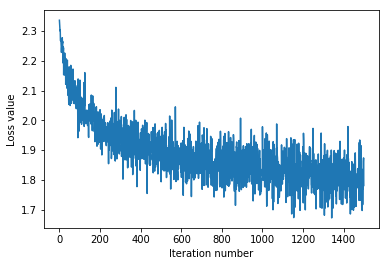

In [113]:
# Implement softmax.train() by filling in the code to extract a batch of data
# and perform the gradient step.
import time


tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took {}s'.format(toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

### Evaluate the performance of the trained softmax classifier on the validation data.

In [114]:
## Implement softmax.predict() and use it to compute the training and testing error.

y_train_pred = softmax.predict(X_train)
print('training accuracy: {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))

training accuracy: 0.3811428571428571
validation accuracy: 0.398


## Optimize the softmax classifier

You may copy and paste your optimization code from the SVM here.

In [115]:
np.finfo(float).eps

2.220446049250313e-16

iteration 0 / 1500: loss 2.3576553806278544
iteration 100 / 1500: loss 1.93589825797556
iteration 200 / 1500: loss 1.9273240580442732
iteration 300 / 1500: loss 1.7423956884108804
iteration 400 / 1500: loss 1.7072943470518038
iteration 500 / 1500: loss 1.8142200158117503
iteration 600 / 1500: loss 1.8996514093247183
iteration 700 / 1500: loss 1.871592150122687
iteration 800 / 1500: loss 1.8879009029406573
iteration 900 / 1500: loss 1.5749871606242316
iteration 1000 / 1500: loss 1.6329837003518668
iteration 1100 / 1500: loss 1.9192438076691005
iteration 1200 / 1500: loss 1.537161448102313
iteration 1300 / 1500: loss 1.6536380942004396
iteration 1400 / 1500: loss 1.8085163840746703
That took 1.9410858154296875s


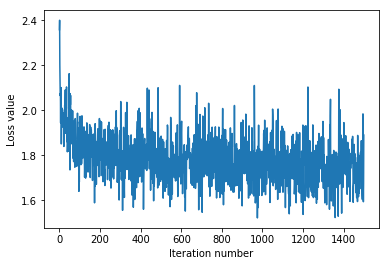

[6 9 9 ... 4 9 3]
training accuracy for learning rate 5e-06 is : 0.400265306122449
validation accuracy for learning rate 5e-06 is : 0.374


iteration 0 / 1500: loss 2.409037218578402
iteration 100 / 1500: loss 1.9154241110396741
iteration 200 / 1500: loss 1.7291411303025506
iteration 300 / 1500: loss 1.7215870085449996
iteration 400 / 1500: loss 1.7493573485328253
iteration 500 / 1500: loss 1.8032512387019188
iteration 600 / 1500: loss 1.7700561372174337
iteration 700 / 1500: loss 1.6670705207288667
iteration 800 / 1500: loss 1.6774106473942745
iteration 900 / 1500: loss 1.6335696535001738
iteration 1000 / 1500: loss 1.8252016433399225
iteration 1100 / 1500: loss 1.7215744953128376
iteration 1200 / 1500: loss 1.7298032252665476
iteration 1300 / 1500: loss 1.5409743782279621
iteration 1400 / 1500: loss 1.728199834339292
That took 1.928626298904419s


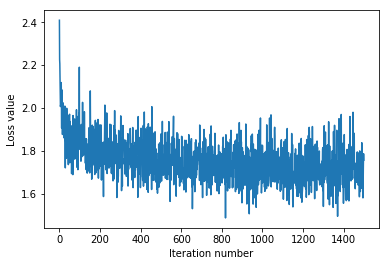

[6 9 9 ... 4 9 3]
training accuracy for learning rate 4e-06 is : 0.42012244897959183
validation accuracy for learning rate 4e-06 is : 0.391


iteration 0 / 1500: loss 2.3120986759745024
iteration 100 / 1500: loss 1.851126756583106
iteration 200 / 1500: loss 1.7919975792255627
iteration 300 / 1500: loss 1.676487897750487
iteration 400 / 1500: loss 1.7022294399012354
iteration 500 / 1500: loss 1.8137357679847035
iteration 600 / 1500: loss 1.6037147510466505
iteration 700 / 1500: loss 1.7407821145247153
iteration 800 / 1500: loss 1.7429512189671075
iteration 900 / 1500: loss 1.7486701715583661
iteration 1000 / 1500: loss 1.6875137350609128
iteration 1100 / 1500: loss 1.6979990173633521
iteration 1200 / 1500: loss 1.6022557818598733
iteration 1300 / 1500: loss 1.7520960496839273
iteration 1400 / 1500: loss 1.6278495879404757
That took 1.7472028732299805s


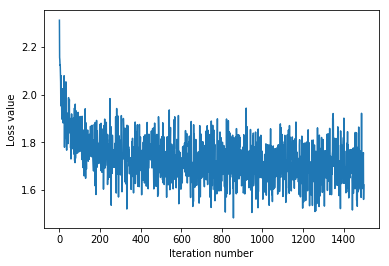

[6 9 9 ... 4 9 3]
training accuracy for learning rate 3e-06 is : 0.4212448979591837
validation accuracy for learning rate 3e-06 is : 0.397


iteration 0 / 1500: loss 2.398159109870573
iteration 100 / 1500: loss 2.00352105524919
iteration 200 / 1500: loss 1.6546044667093782
iteration 300 / 1500: loss 1.8999142185501012
iteration 400 / 1500: loss 1.6473210938698803
iteration 500 / 1500: loss 1.7311253034022185
iteration 600 / 1500: loss 1.7490283600608365
iteration 700 / 1500: loss 1.7733360122538695
iteration 800 / 1500: loss 1.7208624464628037
iteration 900 / 1500: loss 1.6585811910712862
iteration 1000 / 1500: loss 1.8066855902160837
iteration 1100 / 1500: loss 1.711904448308832
iteration 1200 / 1500: loss 1.7627980460403776
iteration 1300 / 1500: loss 1.6799836487535504
iteration 1400 / 1500: loss 1.7043166638741578
That took 1.7349960803985596s


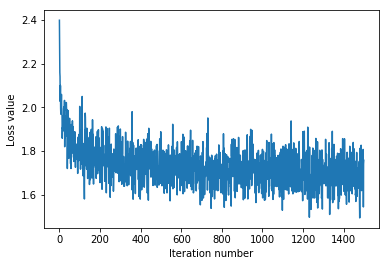

[6 9 9 ... 4 9 3]
training accuracy for learning rate 2e-06 is : 0.4292244897959184
validation accuracy for learning rate 2e-06 is : 0.408


iteration 0 / 1500: loss 2.356742438083568
iteration 100 / 1500: loss 1.9023716034013598
iteration 200 / 1500: loss 1.7682992130187214
iteration 300 / 1500: loss 1.8254896085003605
iteration 400 / 1500: loss 1.7202675523566853
iteration 500 / 1500: loss 1.8152003444957487
iteration 600 / 1500: loss 1.735918915381196
iteration 700 / 1500: loss 1.7548163601360391
iteration 800 / 1500: loss 1.689434153068959
iteration 900 / 1500: loss 1.7501699642764774
iteration 1000 / 1500: loss 1.585944340706543
iteration 1100 / 1500: loss 1.7989691111371306
iteration 1200 / 1500: loss 1.5133197326343508
iteration 1300 / 1500: loss 1.590878003059523
iteration 1400 / 1500: loss 1.9040771181950347
That took 1.6050639152526855s


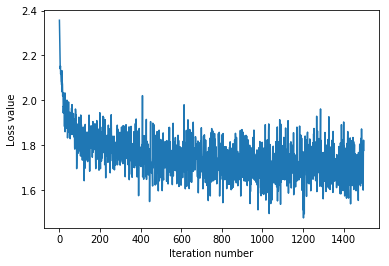

[6 9 9 ... 4 9 3]
training accuracy for learning rate 1e-06 is : 0.4179795918367347
validation accuracy for learning rate 1e-06 is : 0.401


iteration 0 / 1500: loss 2.3839362218597184
iteration 100 / 1500: loss 1.843979932364719
iteration 200 / 1500: loss 1.825233486388035
iteration 300 / 1500: loss 1.6834595636380991
iteration 400 / 1500: loss 1.7742804932731764
iteration 500 / 1500: loss 1.704996316218441
iteration 600 / 1500: loss 1.7272818454257808
iteration 700 / 1500: loss 1.8485685051584766
iteration 800 / 1500: loss 1.6741599086102361
iteration 900 / 1500: loss 1.6388796770613243
iteration 1000 / 1500: loss 1.7735290539635113
iteration 1100 / 1500: loss 1.5687880379681511
iteration 1200 / 1500: loss 1.707068245096758
iteration 1300 / 1500: loss 1.7945967262716034
iteration 1400 / 1500: loss 1.6037049313049279
That took 1.6850111484527588s


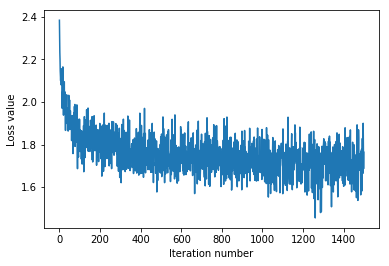

[6 9 9 ... 4 9 3]
training accuracy for learning rate 9e-07 is : 0.42191836734693877
validation accuracy for learning rate 9e-07 is : 0.419


iteration 0 / 1500: loss 2.378537504242214
iteration 100 / 1500: loss 1.7993085820338335
iteration 200 / 1500: loss 1.7860085824499798
iteration 300 / 1500: loss 1.7393907312159462
iteration 400 / 1500: loss 1.7627826278513328
iteration 500 / 1500: loss 1.709640916243393
iteration 600 / 1500: loss 1.6996021281145988
iteration 700 / 1500: loss 1.716922659570528
iteration 800 / 1500: loss 1.746537811229075
iteration 900 / 1500: loss 1.7101456749639061
iteration 1000 / 1500: loss 1.6299438025834174
iteration 1100 / 1500: loss 1.6465612883048346
iteration 1200 / 1500: loss 1.6928595475220383
iteration 1300 / 1500: loss 1.7605043430668155
iteration 1400 / 1500: loss 1.605121303948523
That took 1.8082060813903809s


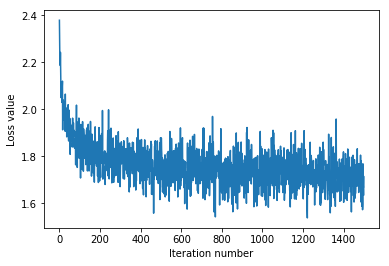

[6 9 9 ... 4 9 3]
training accuracy for learning rate 8e-07 is : 0.4184897959183673
validation accuracy for learning rate 8e-07 is : 0.408


iteration 0 / 1500: loss 2.329121738670368
iteration 100 / 1500: loss 1.8795008373008353
iteration 200 / 1500: loss 1.7842990577359523
iteration 300 / 1500: loss 1.8557206131595603
iteration 400 / 1500: loss 1.8173535987120808
iteration 500 / 1500: loss 1.8427429647241496
iteration 600 / 1500: loss 1.7143164819360432
iteration 700 / 1500: loss 1.836408383631865
iteration 800 / 1500: loss 1.8192339267664337
iteration 900 / 1500: loss 1.758358428972906
iteration 1000 / 1500: loss 1.690246782059445
iteration 1100 / 1500: loss 1.8138406976590886
iteration 1200 / 1500: loss 1.7634865818017627
iteration 1300 / 1500: loss 1.5830426354433116
iteration 1400 / 1500: loss 1.7258849208126632
That took 1.6830198764801025s


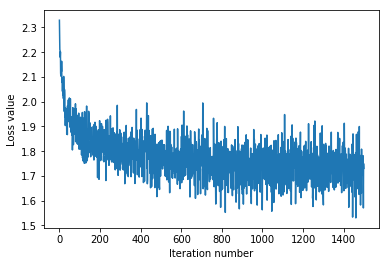

[6 9 9 ... 4 9 3]
training accuracy for learning rate 7e-07 is : 0.4165714285714286
validation accuracy for learning rate 7e-07 is : 0.426


iteration 0 / 1500: loss 2.362941141602237
iteration 100 / 1500: loss 1.9146051983453445
iteration 200 / 1500: loss 1.7596472833188108
iteration 300 / 1500: loss 1.806881780864091
iteration 400 / 1500: loss 1.8322915258301748
iteration 500 / 1500: loss 1.8250214403245477
iteration 600 / 1500: loss 1.7191580732001959
iteration 700 / 1500: loss 1.745029735884275
iteration 800 / 1500: loss 1.75710223783142
iteration 900 / 1500: loss 1.7880854626880178
iteration 1000 / 1500: loss 1.6757269000595656
iteration 1100 / 1500: loss 1.7704793434609365
iteration 1200 / 1500: loss 1.8810067286598724
iteration 1300 / 1500: loss 1.8480579080790986
iteration 1400 / 1500: loss 1.6938881150860339
That took 1.678865909576416s


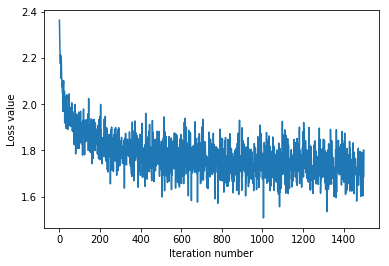

[6 9 9 ... 4 9 3]
training accuracy for learning rate 6e-07 is : 0.4166734693877551
validation accuracy for learning rate 6e-07 is : 0.412


iteration 0 / 1500: loss 2.285391566931941
iteration 100 / 1500: loss 1.8927939460953263
iteration 200 / 1500: loss 1.861633162692902
iteration 300 / 1500: loss 1.792768558232924
iteration 400 / 1500: loss 1.91454264902643
iteration 500 / 1500: loss 1.833364213300675
iteration 600 / 1500: loss 1.7412062353656779
iteration 700 / 1500: loss 1.8100674930859468
iteration 800 / 1500: loss 1.724595059674156
iteration 900 / 1500: loss 1.7777174942624094
iteration 1000 / 1500: loss 1.7163391346210284
iteration 1100 / 1500: loss 1.8169053907087416
iteration 1200 / 1500: loss 1.7091727526277294
iteration 1300 / 1500: loss 1.8216262012273006
iteration 1400 / 1500: loss 1.836111937500848
That took 1.6385509967803955s


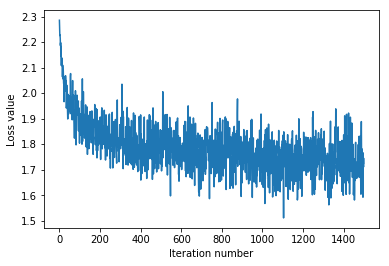

[6 9 9 ... 4 9 3]
training accuracy for learning rate 5e-07 is : 0.4076530612244898
validation accuracy for learning rate 5e-07 is : 0.405


iteration 0 / 1500: loss 2.3561184439606544
iteration 100 / 1500: loss 2.1112444997474817
iteration 200 / 1500: loss 1.9922712844013069
iteration 300 / 1500: loss 1.888919968322368
iteration 400 / 1500: loss 1.8466189354513671
iteration 500 / 1500: loss 1.882470515035106
iteration 600 / 1500: loss 1.8626655006699044
iteration 700 / 1500: loss 1.8497053608233807
iteration 800 / 1500: loss 1.6918453400757734
iteration 900 / 1500: loss 1.8343493726567919
iteration 1000 / 1500: loss 1.8961661313717684
iteration 1100 / 1500: loss 1.8191437131106587
iteration 1200 / 1500: loss 1.7796148486689594
iteration 1300 / 1500: loss 1.75900320977921
iteration 1400 / 1500: loss 1.7230186212699823
That took 1.7730629444122314s


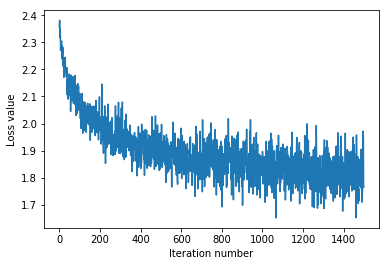

[6 9 9 ... 4 9 3]
training accuracy for learning rate 1e-07 is : 0.3799183673469388
validation accuracy for learning rate 1e-07 is : 0.384


iteration 0 / 1500: loss 2.4607785414117984
iteration 100 / 1500: loss 2.1579052013520514
iteration 200 / 1500: loss 2.0486313423194558
iteration 300 / 1500: loss 2.049364459537616
iteration 400 / 1500: loss 1.9408176109387312
iteration 500 / 1500: loss 2.011241827164475
iteration 600 / 1500: loss 1.896719803652482
iteration 700 / 1500: loss 1.960498886213769
iteration 800 / 1500: loss 1.9084495170979923
iteration 900 / 1500: loss 1.883524824315841
iteration 1000 / 1500: loss 1.8474726698464223
iteration 1100 / 1500: loss 1.8930337144070086
iteration 1200 / 1500: loss 1.914908146642542
iteration 1300 / 1500: loss 1.865630684852108
iteration 1400 / 1500: loss 1.89211096657368
That took 1.8338348865509033s


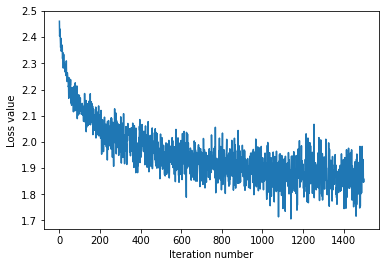

[6 9 9 ... 4 9 3]
training accuracy for learning rate 5e-08 is : 0.36136734693877554
validation accuracy for learning rate 5e-08 is : 0.375


iteration 0 / 1500: loss 2.422830150600726
iteration 100 / 1500: loss 2.3139269576488295
iteration 200 / 1500: loss 2.297529415051061
iteration 300 / 1500: loss 2.204710524857136
iteration 400 / 1500: loss 2.1958725710114027
iteration 500 / 1500: loss 2.1280297054985056
iteration 600 / 1500: loss 2.1272474439695976
iteration 700 / 1500: loss 2.1927857890424396
iteration 800 / 1500: loss 2.1225904605217076
iteration 900 / 1500: loss 2.0941827528701977
iteration 1000 / 1500: loss 2.108401789472872
iteration 1100 / 1500: loss 2.0571794899907765
iteration 1200 / 1500: loss 2.132109196369314
iteration 1300 / 1500: loss 2.032063938329582
iteration 1400 / 1500: loss 2.0952804438412356
That took 1.7740752696990967s


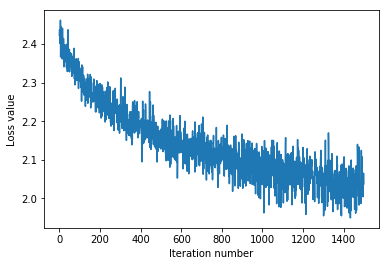

[6 9 9 ... 4 9 3]
training accuracy for learning rate 1e-08 is : 0.28377551020408165
validation accuracy for learning rate 1e-08 is : 0.3


iteration 0 / 1500: loss 2.3637096695497615
iteration 100 / 1500: loss 2.2706337665457967
iteration 200 / 1500: loss 2.2476053757568257
iteration 300 / 1500: loss 2.237711385729318
iteration 400 / 1500: loss 2.2608966183991246
iteration 500 / 1500: loss 2.206633419594249
iteration 600 / 1500: loss 2.215166729045339
iteration 700 / 1500: loss 2.1680624854774573
iteration 800 / 1500: loss 2.1410701882732694
iteration 900 / 1500: loss 2.123571267586308
iteration 1000 / 1500: loss 2.127270246201289
iteration 1100 / 1500: loss 2.091465866879297
iteration 1200 / 1500: loss 2.119927971607152
iteration 1300 / 1500: loss 2.1129134247302623
iteration 1400 / 1500: loss 2.097697427205185
That took 1.6802148818969727s


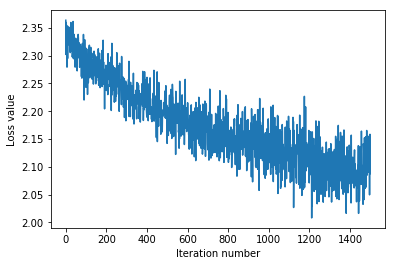

[6 9 9 ... 4 9 3]
training accuracy for learning rate 5e-09 is : 0.2548979591836735
validation accuracy for learning rate 5e-09 is : 0.27




In [120]:
# ================================================================ #
# YOUR CODE HERE:
#   Train the Softmax classifier with different learning rates and 
#     evaluate on the validation data.
#   Report:
#     - The best learning rate of the ones you tested.  
#     - The best validation accuracy corresponding to the best validation error.
#
#   Select the SVM that achieved the best validation error and report
#     its error rate on the test set.
# ================================================================ #
tries = np.array([5e-6,4e-6,3e-6,2e-6,1e-6,9e-7,8e-7,7e-7,6e-7,5e-7,1e-7,5e-8,1e-8,5e-9])
for i in tries:
    tic = time.time()
    loss_hist = softmax.train(X_train, y_train, learning_rate=i,
                      num_iters=1500, verbose=True)
    toc = time.time()
    print('That took {}s'.format(toc - tic))

    plt.plot(loss_hist)
    plt.xlabel('Iteration number')
    plt.ylabel('Loss value')
    plt.show()
    
    y_train_pred = softmax.predict(X_train)
    print(y_train)
    print('training accuracy for learning rate',i ,'is : {}'.format(np.mean(np.equal(y_train,y_train_pred), )))
    y_val_pred = softmax.predict(X_val)
    print('validation accuracy for learning rate',i ,'is : {}'.format(np.mean(np.equal(y_val, y_val_pred)), ))
    print('')
    print('')

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #


In [122]:
error = 1- 0.426
print (error)

0.5740000000000001


The best learning rate is 7e-07. 
The best validation accuracy is 0.426. 
The corresponding validation error is 0.574. 
